# Housing Prices Prediction

### Price of the Houses: The sale price of the house in a specified currency.
### Area: The size of the house, typically in square feet or square meters.
### Bedrooms: The number of bedrooms in the house.
### Bathrooms: The number of bathrooms in the house.
### Stories: The number of stories (levels or floors) in the house.
### Mainroad: Indicates if the house is connected to a main road (yes/no).
### Guestroom: Indicates if the house has a guest room (yes/no).
### Basement: Indicates if the house has a basement (yes/no).
### Hotwaterheating: Indicates if the house has a hot water heating system (yes/no).
### Airconditioning: Indicates if the house has air conditioning (yes/no).

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # RMSE

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install --upgrade kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.5
    Uninstalling kagglehub-0.3.5:
      Successfully uninstalled kagglehub-0.3.5


## Import Data

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

# Assuming the downloaded dataset is in CSV format
data = pd.read_csv(path + "/Housing.csv")  # Update the path if the file name differs


In [8]:
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [10]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [12]:
data['parking'].value_counts()

,count
parking,
0,299
1,126
2,108
3,12


## Cleaning Data

In [14]:
# Fill missing values (NaN) for columns where appropriate
# For continuous variables (like price, area, bedrooms, bathrooms, etc.), use the median
# Replace 'Price of the Houses' with the actual column name for price
data['price'].fillna(data['price'].median(), inplace=True)  # Assuming the column name is 'price'
data['area'].fillna(data['area'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['stories'].fillna(data['stories'].median(), inplace=True)

# For categorical variables (like mainroad, guestroom, basement, hotwaterheating, airconditioning), use the most frequent value (mode)
data['mainroad'].fillna(data['mainroad'].mode()[0], inplace=True)
data['guestroom'].fillna(data['guestroom'].mode()[0], inplace=True)
data['basement'].fillna(data['basement'].mode()[0], inplace=True)
data['hotwaterheating'].fillna(data['hotwaterheating'].mode()[0], inplace=True)
data['airconditioning'].fillna(data['airconditioning'].mode()[0], inplace=True)

data.info() # Changed data.infor() to data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Transforming Categorical Values - One Hot Encoding

In [16]:
# Selecting the categorical columns to encode
categories = data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

# Declare the encoder and fit transform
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output=False instead of sparse=False

# Apply one-hot encoding
encoded_categories = encoder.fit_transform(categories)

# Convert the encoded categories into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories.columns))

# Concatenate the original data (excluding the original categorical columns) with the encoded columns
data_encoded = pd.concat([data.drop(columns=categories.columns), encoded_df], axis=1)

# Display the updated DataFrame
print(data_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking prefarea  \
0  13300000  7420         4          2        3        2      yes   
1  12250000  8960         4          4        4        3       no   
2  12250000  9960         3          2        2        2      yes   
3  12215000  7500         4          2        2        3      yes   
4  11410000  7420         4          1        2        2       no   

  furnishingstatus  mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  \
0        furnished          0.0           1.0           1.0            0.0   
1        furnished          0.0           1.0           1.0            0.0   
2   semi-furnished          0.0           1.0           1.0            0.0   
3        furnished          0.0           1.0           1.0            0.0   
4        furnished          0.0           1.0           0.0            1.0   

   basement_no  basement_yes  hotwaterheating_no  hotwaterheating_yes  \
0          1.0           0.0               

In [17]:
encoder.categories_

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [20]:
encoderDF = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categories.columns))

In [21]:
encoderDF

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
540,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
541,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
542,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
543,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [22]:
data_encoded = pd.concat([data.drop(columns=categories.columns), encoded_df], axis=1)

# Display the updated DataFrame
print(data_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking prefarea  \
0  13300000  7420         4          2        3        2      yes   
1  12250000  8960         4          4        4        3       no   
2  12250000  9960         3          2        2        2      yes   
3  12215000  7500         4          2        2        3      yes   
4  11410000  7420         4          1        2        2       no   

  furnishingstatus  mainroad_no  mainroad_yes  guestroom_no  guestroom_yes  \
0        furnished          0.0           1.0           1.0            0.0   
1        furnished          0.0           1.0           1.0            0.0   
2   semi-furnished          0.0           1.0           1.0            0.0   
3        furnished          0.0           1.0           1.0            0.0   
4        furnished          0.0           1.0           0.0            1.0   

   basement_no  basement_yes  hotwaterheating_no  hotwaterheating_yes  \
0          1.0           0.0               

## Analysis Median House Value

In [25]:
# Filter the dataset where 'Price of the Houses' is less than 0
filtered_data = data[data['price'] < 0]

# Display the filtered dataset
print(filtered_data)


Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


## Outlier Analysis

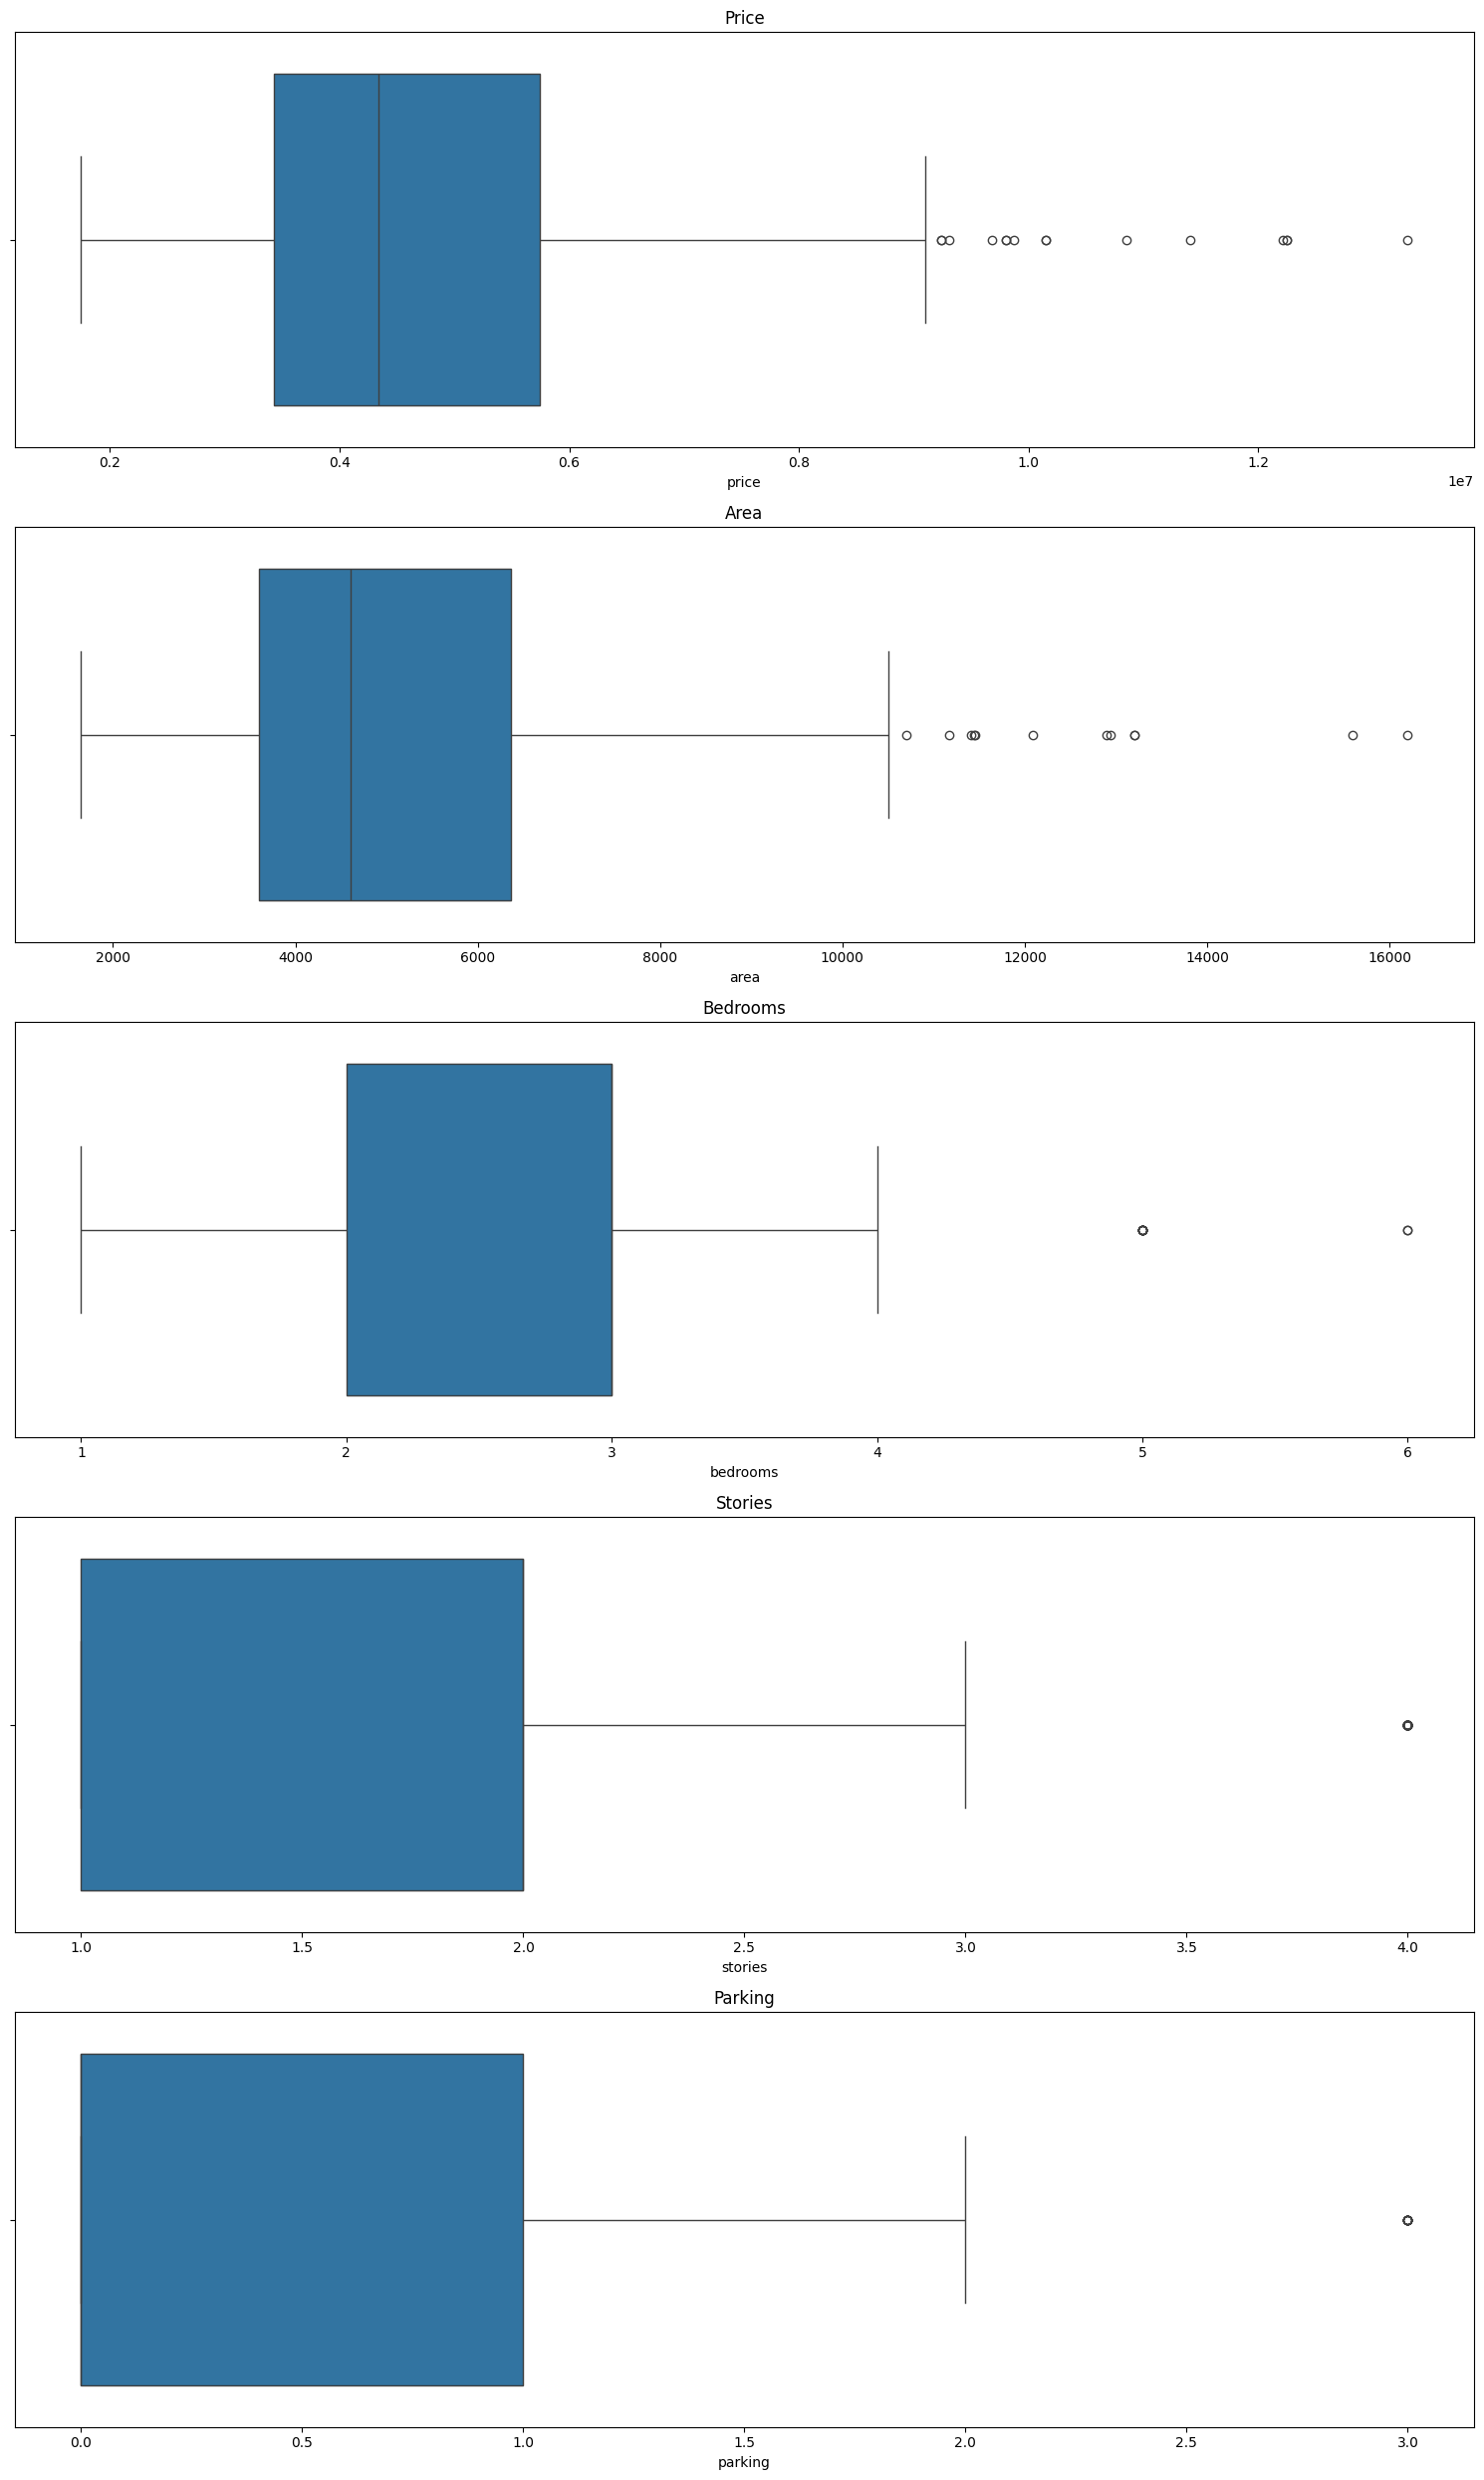

In [33]:
fig, axs = plt.subplots(5, 1, figsize=(15, 25))

# Plot each boxplot using seaborn for each relevant column
sns.boxplot(x=data['price'], ax=axs[0])
axs[0].set_title('Price')

sns.boxplot(x=data['area'], ax=axs[1])
axs[1].set_title('Area')

sns.boxplot(x=data['bedrooms'], ax=axs[2])
axs[2].set_title('Bedrooms')

sns.boxplot(x=data['stories'], ax=axs[3])
axs[3].set_title('Stories')

sns.boxplot(x=data['parking'], ax=axs[4])
axs[4].set_title('Parking')

# Adjust layout for better visualization
plt.tight_layout()


In [34]:
# Calculate the first and third quartiles (Q1 and Q3) for the 'price' column (or your column of choice)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Filter the dataset to remove outliers based on the IQR method
data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]

# Display the shape of the cleaned dataset
data.shape


(530, 13)

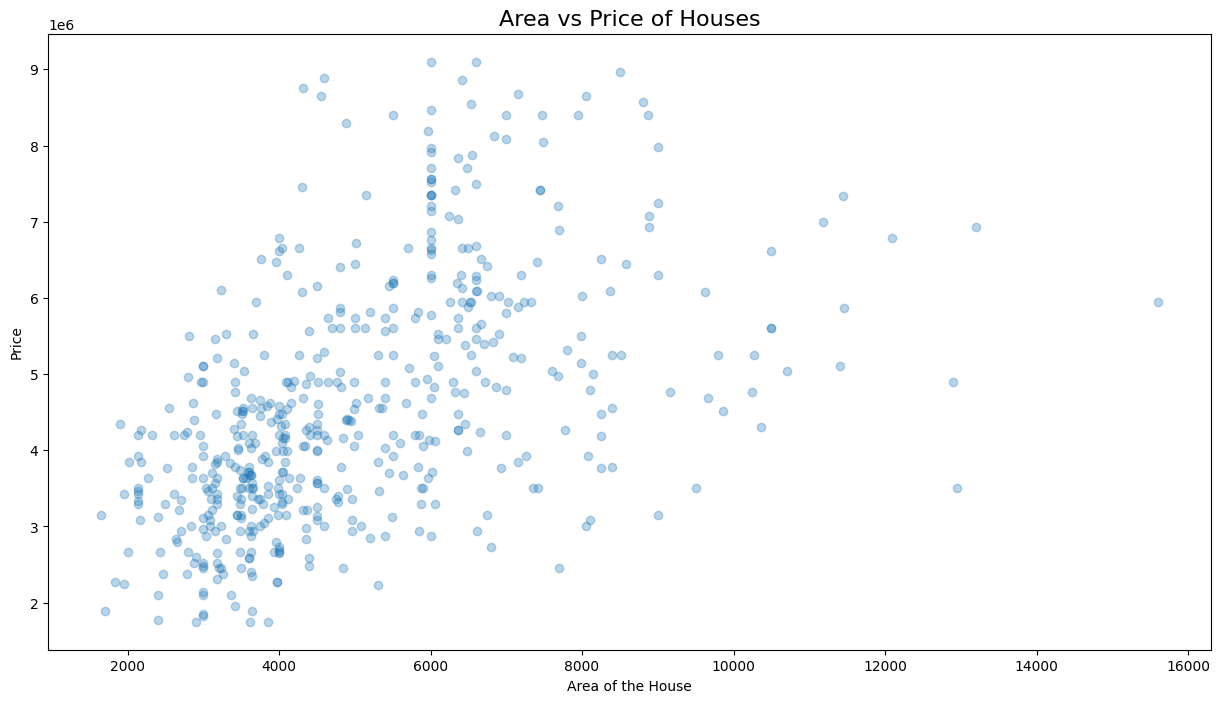

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(data['area'], data['price'], alpha=0.3)  # 'price' is used here assuming it represents the house price
plt.title("Area vs Price of Houses", size=16)
plt.xlabel("Area of the House")
plt.ylabel("Price")
plt.show()

In [56]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Linear Regression
## Build, Train and Predict

In [59]:
data = pd.DataFrame({
    'price': [13300000, 12250000, 12250000, 12215000, 11410000],
    'area': [7420, 8960, 9960, 7500, 7420],
    'bedrooms': [4, 4, 3, 4, 4],
    'bathrooms': [2, 4, 2, 2, 1],
    'stories': [3, 4, 2, 2, 2],
    'mainroad': ['yes', 'yes', 'yes', 'yes', 'yes'],
    'guestroom': ['no', 'no', 'no', 'no', 'yes'],
    'basement': ['no', 'no', 'yes', 'yes', 'yes'],
    'hotwaterheating': ['no', 'no', 'no', 'no', 'no'],
    'airconditioning': ['yes', 'yes', 'no', 'yes', 'yes'],
    'parking': [2, 3, 2, 3, 2],
    'prefarea': ['yes', 'no', 'yes', 'yes', 'no'],
    'furnishingstatus': ['furnished', 'furnished', 'semi-furnished', 'furnished', 'furnished']
})

In [63]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                       'airconditioning', 'prefarea', 'furnishingstatus']

# One-Hot Encoding for categorical variables (yes/no, furnished, etc.)
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity # Use sparse_output=False instead of sparse=False
encoded_data = encoder.fit_transform(data[categorical_columns])

# Convert the encoded data back to a DataFrame
# Use get_feature_names_out instead of get_feature_names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# The line below causing the error has been removed
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(categorical_columns))
data_encoded = data.drop(columns=categorical_columns)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['price'])  # Features (exclude 'price' column)
y = data_encoded['price']  # Target variable ('price')

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = lr.predict(X_test)
print("Predictions:", y_pred)


Predictions: [13853872.67808474]


In [65]:
score = lr.score(X_test, y_test)
print("Model R-squared:", score)

Model R-squared: nan


### Data Visualization

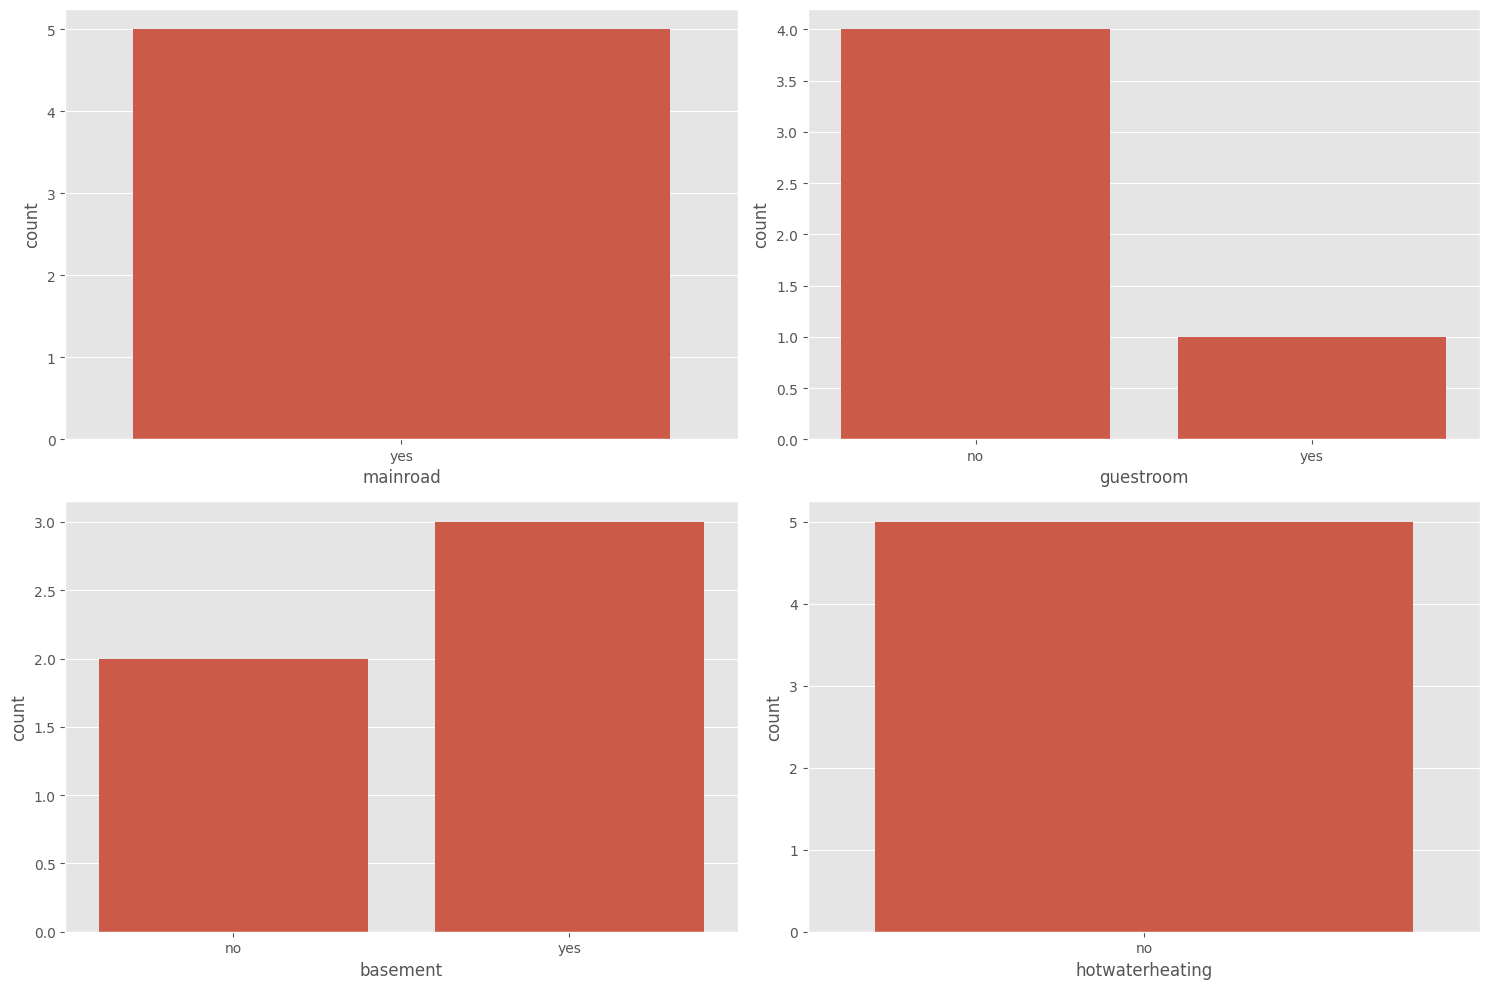

In [68]:
# Countplot for categorical columns like 'mainroad', 'guestroom', 'basement', etc.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x=data['mainroad'], ax=axs[0, 0])
sns.countplot(x=data['guestroom'], ax=axs[0, 1])
sns.countplot(x=data['basement'], ax=axs[1, 0])
sns.countplot(x=data['hotwaterheating'], ax=axs[1, 1])

plt.tight_layout()
plt.show()


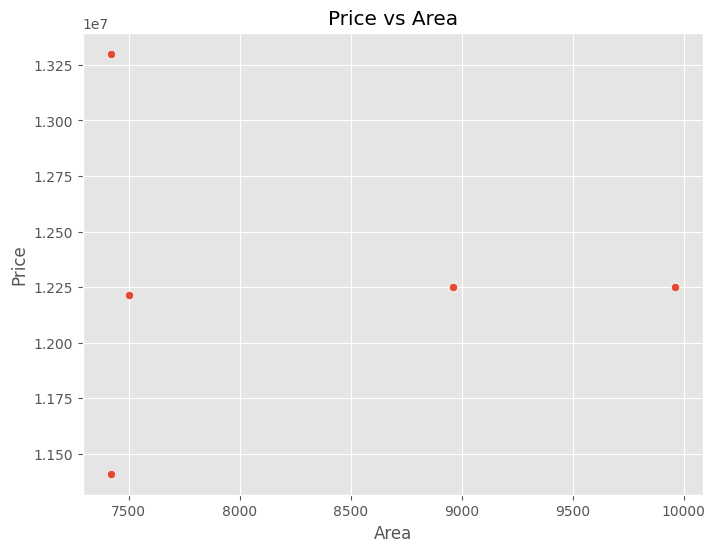

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['area'], y=data['price'])
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


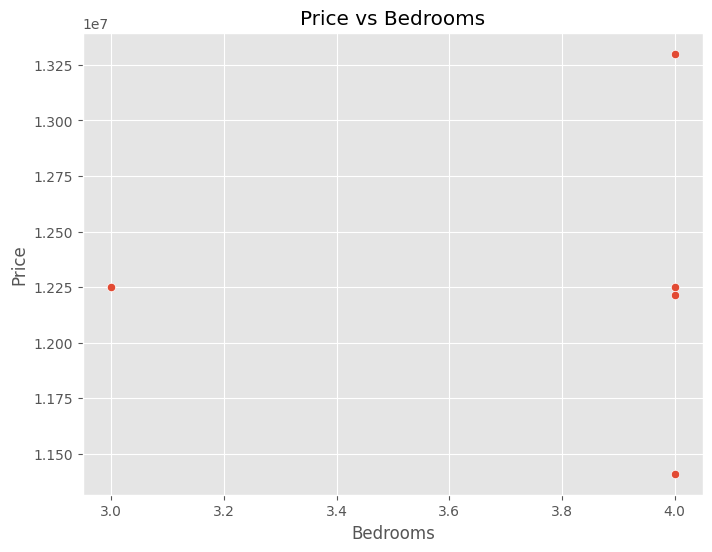

In [70]:
# Price vs Bedrooms
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['bedrooms'], y=data['price'])
plt.title('Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

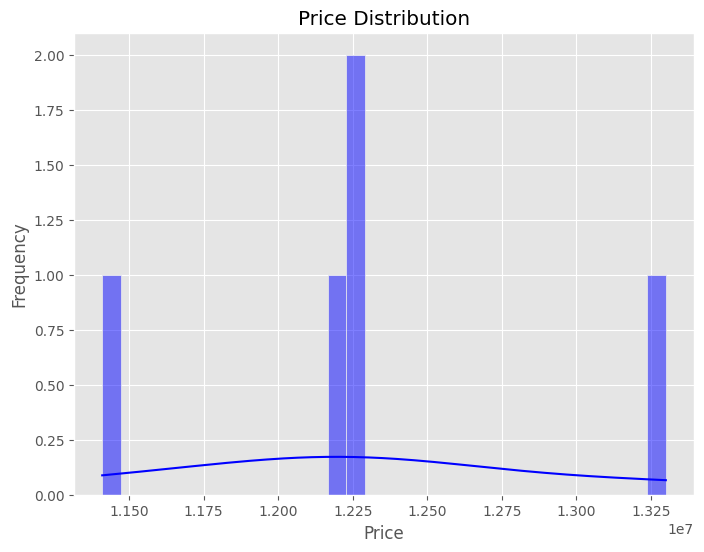

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


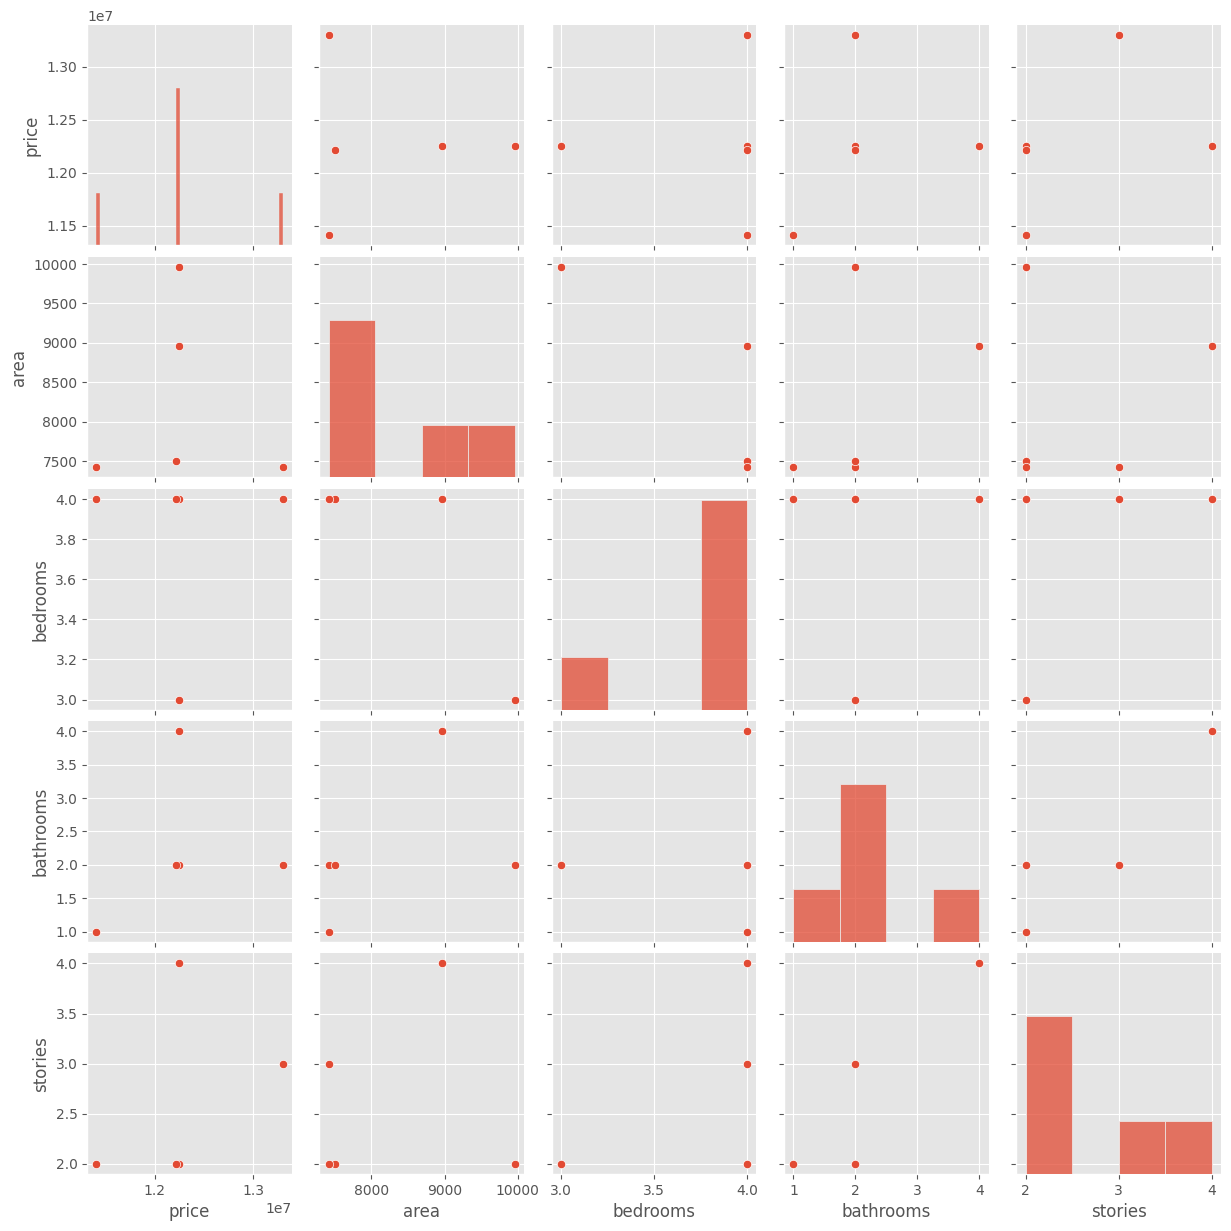

In [74]:
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories']])
plt.show()


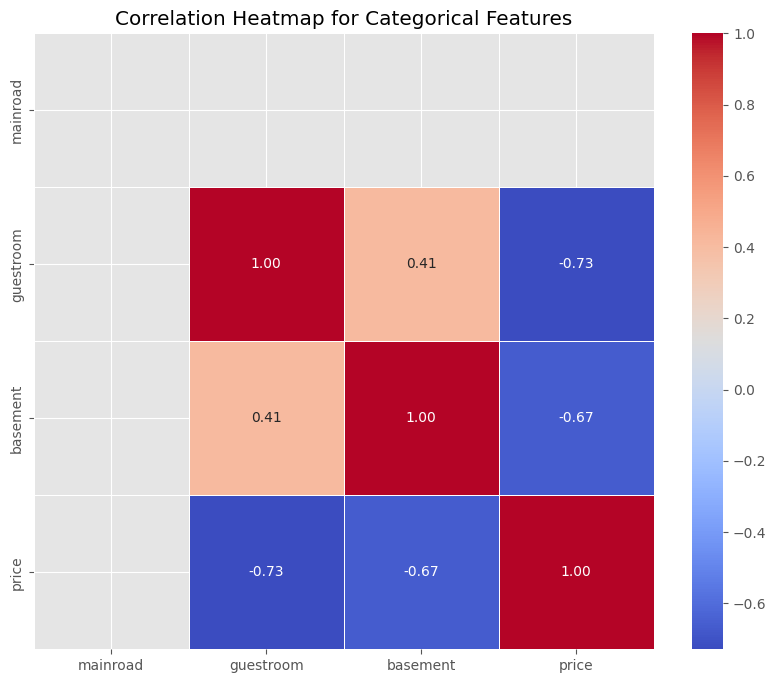

In [75]:
category_data = data[['mainroad', 'guestroom', 'basement', 'price']].copy()

# Encoding categorical variables
category_data['mainroad'] = category_data['mainroad'].map({'yes': 1, 'no': 0})
category_data['guestroom'] = category_data['guestroom'].map({'yes': 1, 'no': 0})
category_data['basement'] = category_data['basement'].map({'yes': 1, 'no': 0})

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Categorical Features')
plt.show()


## Thank you